In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
X_train = pd.read_csv("Logistic_X_Train.csv")
Y_train = pd.read_csv("Logistic_Y_Train.csv")

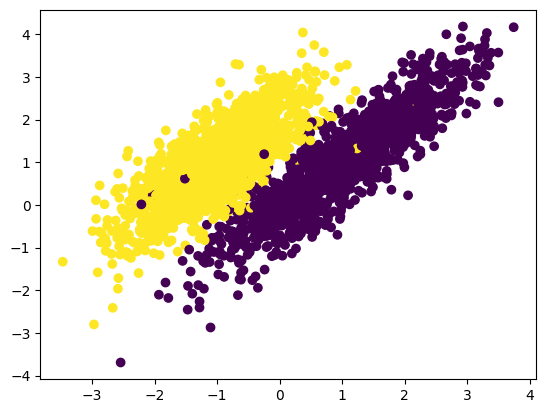

In [54]:
X_train,Y_train = X_train.values, Y_train.values
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.legend=True


In [55]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train-X_mean)/-X_std

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    hy = hypothesis(X,theta)
    err = -1*np.mean((y*np.log(hy)) + ((1-y)*np.log(1-hy)))
    return err

def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    return grad/X.shape[0]

def gradient_decent(X,y,lr=0.5, max_steps = 100):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(max_steps):
        err = error(X,y,theta)
        error_list.append(err)
        grad = gradient(X,y,theta)
        theta = theta+lr*grad

    return (theta,error_list)







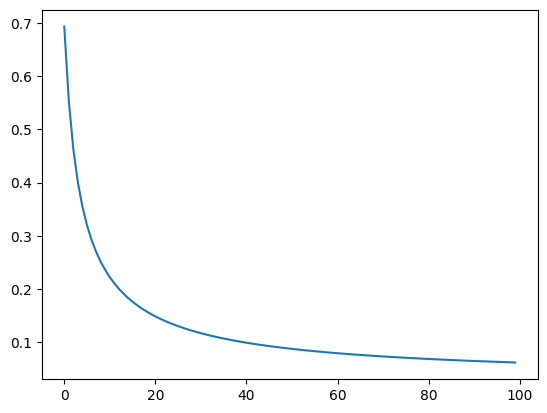

In [56]:
X_with_bias = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_with_bias
theta,error_list  = gradient_decent(X_with_bias,Y_train)
plt.plot(error_list)

In [58]:

prob = hypothesis(X_with_bias[0].reshape(1, -1), theta)
prediction = 1 if prob >= 0.5 else 0
print(Y_train[0], prediction)


[1] 1


In [59]:
X_test = pd.read_csv("Logistic_X_Test.csv")
X_test = X_test.values

In [60]:
X_test_mean = X_test.mean(axis=0)
X_test_std = X_test.std(axis=0)
X_test = (X_test-X_test_mean)/-X_test_std

In [61]:
X_test_with_bias = np.hstack((np.ones((X_test.shape[0],1)), X_test))

In [62]:
predicted_labels = []
for i in X_test_with_bias:
    prob = hypothesis(i.reshape(1, -1), theta)
    prediction = 1 if prob >= 0.5 else 0
    predicted_labels.append(prediction)

predicted_labels = np.array(predicted_labels)
predicted_df = pd.DataFrame({"label":predicted_labels})
predicted_df.to_csv("prediction.csv", index=False)